In [11]:
#-*- coding: utf-8 -*-

In [21]:
# 设置字体
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [31]:
from covid_report import getdata,data_processing,covid_visualization

# get data
latest_data_global,prev_data_global,latest_data_us,prev_data_us = getdata.GET_csse_covid_19_daily_reports()
ts_confirmed_us,ts_confirmed_global,ts_deaths_us,ts_deaths_global,ts_recovered_global = getdata.GET_csse_covid_19_time_series()
shanghai_df = getdata.GET_shanghai_data(plot=True)  # 这里包含近10天的上海无症状新增趋势！pip uninstall


正在读取数据......
读取完毕
正在读取数据......
读取完毕


In [3]:
# data processing
ts_confirmed_CHINA_incre, loc_data_CHINA, sorted_provinces = data_processing.ts_process_CHINA(ts_confirmed_global,clip=True)
ts_deaths_CHINA_incre, _, _ = data_processing.ts_process_CHINA(ts_deaths_global,clip=True)
ts_recovered_CHINA_incre, _, _ = data_processing.ts_process_CHINA(ts_recovered_global,clip=True)

# 8号至13号上海数据没有在jhu上更新，14号数据重新更新了，所以下面代码暂不需要！
# start_missing_day = '2022-04-08'
# data_to_change = ts_confirmed_CHINA_incre['Shanghai'][ts_confirmed_CHINA_incre['Shanghai'].index>=start_missing_day]
# ts_confirmed_CHINA_incre['Shanghai'][ts_confirmed_CHINA_incre['Shanghai'].index>=start_missing_day] = shanghai_df['本土新增'][shanghai_df.index>=start_missing_day][data_to_change.index]

ts_confirmed_US_incre,loc_data_us,sorted_state = data_processing.ts_process_US(ts_confirmed_us,clip=True)
ts_deaths_US_incre,_,_,population = data_processing.ts_process_US(ts_deaths_us,death = True,clip=True)

latest_data_CHINA = data_processing.daily_process(latest_data_global, country = 'China')
prev_data_CHINA = data_processing.daily_process(prev_data_global, country = 'China')
latest_data_US = data_processing.daily_process(latest_data_us, country = 'US')
prev_data_US = data_processing.daily_process(prev_data_us, country = 'US')


正在读取数据......
读取完毕
正在读取数据......
读取完毕
国家：美国
最新更新时间：2022-04-09 04:31:54
----------------------------------------TOTAL-----------------------------------------
截至目前【美国】累计确诊：80386483 | 新增确诊：94152
截至目前【美国】累计死亡：985202 | 新增死亡：634
截至目前【New York】累计确诊：5028707 | 新增确诊：5786
截至目前【New York】累计死亡：68041 | 新增死亡：9
----------------------------------------DETAIL----------------------------------------
蓝色为确诊数
红色为死亡数
--------------------------------------------------------------------------------------
省级行政区                     新增确诊数↓     新增死亡数      每10万人确诊人数  累计致死率     
Texas                          32788            71             23386.953         1.293%        
Florida                        21348            42             27499.88          1.245%        
California                     11564            111            23114.182         0.978%        
New York                       5786             9              25849.802         1.353%        
Washington                     2661             22             

国家：美国
最新更新时间：2022-04-09 04:31:54
----------------------------------------TOTAL-----------------------------------------
截至目前【美国】累计确诊：80386483 | 新增确诊：94152
截至目前【美国】累计死亡：985202 | 新增死亡：634
----------------------------------------DETAIL----------------------------------------
蓝色为确诊数
红色为死亡数
--------------------------------------------------------------------------------------
省级行政区                     新增确诊数↓     新增死亡数      每10万人确诊人数  累计致死率     
Texas                          32788            71             23386.953         1.293%        
Florida                        21348            42             27499.88          1.245%        
California                     11564            111            23114.182         0.978%        
New York                       5786             9              25849.802         1.353%        
Washington                     2661             22             19265.655         0.857%        
Illinois                       2312             11             24309.34     

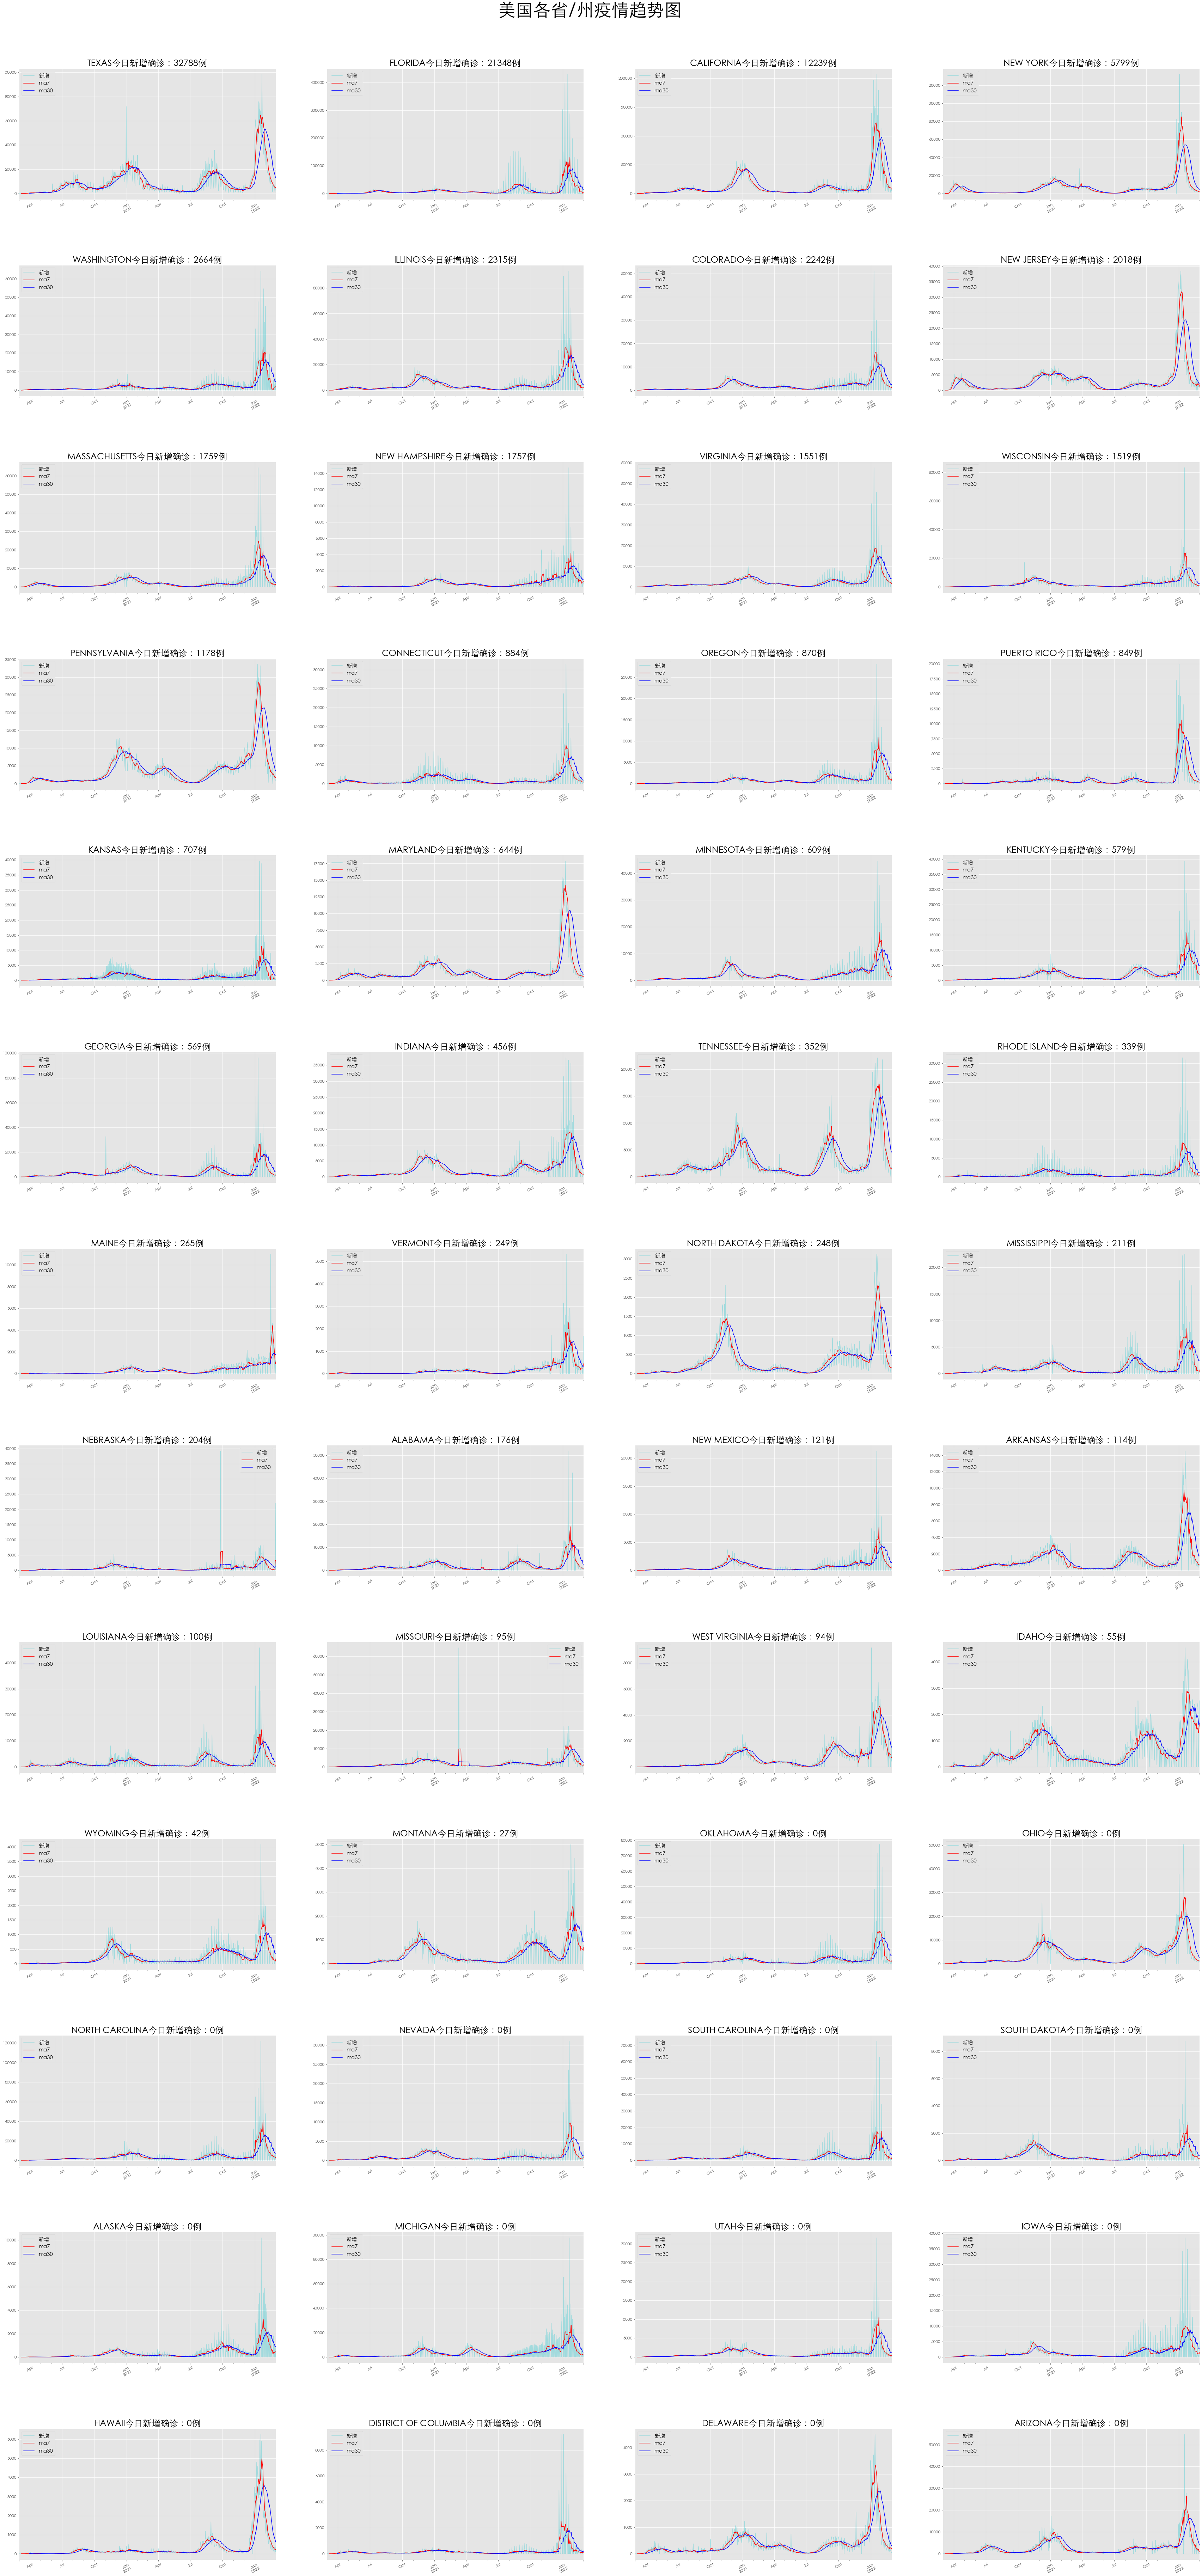

In [27]:
# visualization
covid_visualization.Decompose_US(
    ts_confirmed_US_incre,
    latest_data_US,
    prev_data_US,
    start='2020-03-01',
    end='2022-06-01',
    ma = [7,30],
    method = '新增',             # method = '累计'
    specify = 'New York',        # specify = 'Shanghai' specify = 'All' specify = None
    verbose = 1,
    kind = '确诊'
)

covid_visualization.Decompose_CHINA(
    ts_confirmed_CHINA_incre,
    latest_data_CHINA,
    prev_data_CHINA,
    start='2020-03-01',
    end='2022-06-01',
    ma = [7,30],
    method = '新增',              # method = '累计'
    specify = 'Shanghai',         # specify = 'Shanghai' specify = 'All' specify = None
    verbose = 1,
    kind = '确诊'
)